## BAIT 509 - Final Group Assignment

### Group Members (Group 22)

### - Michelle LEE
### - Gagan Singh
### - Kaustubh Pandit
### - JEN- HSIANG YANG


### Dataset Overview:
***In the bustling metropolis of Mumbai, India, where the real estate market echoes the heartbeat of the city, our project dives into a dataset that encapsulates the essence of the property landscape. Comprising details on residential properties, including apartments and houses, this dataset unfolds the narrative of Mumbai's housing market. Key attributes such as the number of bedrooms, property type, locality, size, price, and more, serve as the threads weaving this intricate tapestry.***

### Motivation:
****The driving force behind our exploration lies in the inherent challenges faced by both buyers and sellers in Mumbai's bustling real estate scene. With properties ranging from apartments to villas, each equipped with distinctive attributes, understanding the factors influencing house prices becomes imperative. This predictive model aims to empower stakeholders with valuable insights, facilitating informed decisions in this high-stakes domain.****

### Business Question:
***In response to the intricacies of Mumbai's real estate landscape, our business question is poised to tackle the heart of the matter: Can we construct a robust supervised learning model capable of accurately predicting house prices? By delving into the features embedded in property listings, including the number of bedrooms, property type, locality, size, and other pertinent details, our aim is to equip our client with a predictive tool that transcends the uncertainties of the market.***

***This question crystallizes the overarching objective of our project: to harness the power of machine learning in deciphering the nuanced relationships between property features and prices, ultimately providing a valuable tool for navigating the intricate world of Mumbai's real estate.***

### Import Neccessary Packages

In [147]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
import altair as alt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


## Data Preprocessing:

In [86]:
#Read the CSV file
data = pd.read_csv('properties.csv')

#Display the first few rows of the DataFrame
data.head()

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


### ***Checking the first 50 columns for Nulls since the rest of the columns are already One Hot Encoded and we will need to conduct transformations or drop only these columns***

In [87]:
#Checking the first 50 columns for null values
data.iloc[:, :50].isnull().sum()

ID                              0
Possession Status              78
Availability Starts From     9602
Floor No                      858
Commercial                      0
Developer                    5679
Approved Authority Name      6542
Units Available              6550
Price                          84
Price (English)                 0
Flooring Type                4534
Electricity Status           5425
Maintenance Type             5613
Maintenance Charges          6402
Booking Amount               4984
Landmark                     4644
Covered Area                 1311
Project Name                 4531
sqft Price                   1205
Carpet Area                  2552
Area Name                       0
Property Uniqueness          8025
Unit of Carpet Area          1307
Society                         0
Ownership Type               3260
furnished Type                 77
Bathroom                       69
Parking                      6159
Facing                       3569
Amenities Faci

In [88]:
data = data.drop(['ID','Price (English)', 'Landmark','Rera','Developer','Luxury Flat','isLuxuryServiceProvided',
                  'Approved Authority Name','Availability Starts From','Project Name','Flooring Type',
                  'Booking Amount','Area Name','Property Uniqueness','Parking','Amenities Facing','Floor Data',
                  'Data Referred From','Location','Property','Possession By', 'NRI Pref','Land Area / Covered Area',
                  'Land Area Unit', 'Pantry Type','Tenants Preference','sqft Price ','Covered Area.1'], axis=1)

In [89]:
data.iloc[:, :27].isnull().sum()

Possession Status            78
Floor No                    858
Commercial                    0
Units Available            6550
Price                        84
Electricity Status         5425
Maintenance Type           5613
Maintenance Charges        6402
Covered Area               1311
Carpet Area                2552
Unit of Carpet Area        1307
Society                       0
Ownership Type             3260
furnished Type               77
Bathroom                     69
Facing                     3569
Transaction Type              0
Type of Property              0
City                          0
bedroom                       0
floors                      866
Water Status               5396
Carpet Area Unit           2607
isPrimeLocationProperty       0
covArea Unit               1307
Property Lifespan          4812
balconies                  6923
dtype: int64

### ***Now we will be looking at each of the 30 columns above to see if there is a need for manual transformation of each of the column's non-null values***

In [90]:
data['Possession Status'].value_counts()

Possession Status
Ready to Move         9735
Under Construction    2630
Dec '26                 50
Dec '24                 31
Dec '23                 29
Dec '25                 28
Jun '24                 21
Dec '27                 16
Jun '26                 16
Dec '28                 12
Mar '25                  6
Mar '24                  5
Apr '28                  4
Sep '26                  4
Immediately              4
Nov '25                  3
Apr '24                  3
Jun '25                  3
Sep '23                  3
Nov '23                  2
Select Date              2
Name: count, dtype: int64

In [91]:
# Function to transform the 'Possession Status' values so that there are only two types of non-null values 
# categorising them into Under Consruction and Ready to Move 
def transform_possession_status(value):
    if pd.isnull(value):
        return 'Ready to Move' # Keep null values unchanged
    elif value in ['Immediately', 'Ready to Move','NA','Select Date']:
        return 'Ready to Move'
    #This is done because from the data we can see that for the respective NA rows
    # the transaction types are resale/rent indicating they are ready to move in
    else:
        return 'Under Construction'

# Apply the transformation
data['Possession Status'] = data['Possession Status'].apply(transform_possession_status)

In [92]:
data['Possession Status'].value_counts()

Possession Status
Ready to Move         9819
Under Construction    2866
Name: count, dtype: int64

In [93]:
data['Floor No'].value_counts()

Floor No
3     1004
4      970
2      958
1      920
5      868
      ... 
93       1
65       1
44       1
56       1
66       1
Name: count, Length: 70, dtype: int64

In [94]:
# Function to transform the 'Floor Number' values to keep only numerical data, 
# hence converting the basement data points to numbers
def transform_floor_number(value):
    if pd.isnull(value):
        return value  # Keep null values unchanged
    elif value == 'Upper Basement':
        return -1
    elif value == 'Lower Basement':
        return -2
    elif value == 'Ground':
        return 0
    elif value == 'NA':
        return None
    else:
        return value  # Keep other numeric values unchanged

# Apply the transformation
data['Floor No'] = data['Floor No'].apply(transform_floor_number)

In [95]:
data['Electricity Status'].value_counts()

Electricity Status
No/Rare Powercut             7238
Less Than 2 Hour Powercut      18
2 To 4 Hours Powercut           3
Over 6 Hours Powercut           1
Name: count, dtype: int64

In [96]:
data.rename(columns={'Electricity Status': '24H Elec'}, inplace=True)

# Function to transform the '24H Elec' values to binary
def transform_electricity_status(value):
    if pd.isnull(value):
        return value  # Keep null values unchanged
    elif value == 'No/Rare Powercut':
        return 1
    else:
        return 0

# Apply the transformation
data['24H Elec'] = data['24H Elec'].apply(transform_electricity_status)

In [97]:
data['24H Elec'] = data['24H Elec'].replace(np.nan, 1)
data['24H Elec'].value_counts()

24H Elec
1.0    12663
0.0       22
Name: count, dtype: int64

In [98]:
data['City'].value_counts()

City
Mumbai       8542
Thane        4113
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: count, dtype: int64

In [99]:
# List of cities to be removed
# Dropping these cities since they are not around Mumbai and can skew the pricing data since property prices vary
cities_to_remove = ['Hyderabad', 'Nagpur', 'Agartala', 'Gurgaon']

# Drop rows where 'City' is in the list of cities to remove
data = data[~data['City'].isin(cities_to_remove)]

# Drop the 'City' column since now all the data points are in and around Mumbai
data.drop('City', axis=1, inplace=True)

In [100]:
data['floors'].value_counts()

floors
7.0      1652
4.0       842
22.0      642
8.0       479
23.0      409
         ... 
77.0        1
200.0       1
71.0        1
93.0        1
74.0        1
Name: count, Length: 83, dtype: int64

In [101]:
data['floors'] = data['floors'].replace('NA', np.nan)

# Display the Valuecounts to verify changes
data['floors'].value_counts()

floors
7.0      1652
4.0       842
22.0      642
8.0       479
23.0      409
         ... 
77.0        1
200.0       1
71.0        1
93.0        1
74.0        1
Name: count, Length: 83, dtype: int64

In [102]:
data['Water Status'].value_counts()

Water Status
Water Availability 24 Hours Available    7023
Water Availability 1 Hour Available       115
Water Availability 2 Hours Available       83
Water Availability 12 Hours Available      39
Water Availability 6 Hours Available       23
Name: count, dtype: int64

In [103]:
# Rename the 'Water Status' column to '24H Water'
data.rename(columns={'Water Status': '24H Water'}, inplace=True)

# Function to transform the '24H Water' values
def transform_water_status(value):
    if pd.isnull(value):
        return np.nan  # Keep null values unchanged
    elif value == 'Water Availability 24 Hours Available':
        return 1
    else:
        return 0

# Apply the transformation
data['24H Water'] = data['24H Water'].apply(transform_water_status)

In [104]:
data['24H Water'].value_counts()

24H Water
1.0    7023
0.0     260
Name: count, dtype: int64

In [105]:
data['balconies'].value_counts()

balconies
1.0    2687
2.0    1456
3.0    1138
4.0     351
5.0      84
6.0      26
7.0       6
8.0       4
Name: count, dtype: int64

In [106]:
# Replace 'NA' with NaN in the 'Balconies' column
data['balconies'] = data['balconies'].replace('NA', np.nan)

# Display the DataFrame to verify changes
data.to_csv('output.csv', index=False)


In [107]:
data['Property Lifespan'].value_counts()

Property Lifespan
New Construction     1896
5 to 10 years        1609
Less than 5 years    1558
10 to 15 years       1119
Above 20 years        991
15 to 20 years        691
Name: count, dtype: int64

In [108]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft      11345
Sq-m          11
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [109]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft     10050
Sq-m         15
Acre          3
Marla         1
Ground        1
Name: count, dtype: int64

In [110]:
data['covArea Unit'].value_counts()

covArea Unit
Sq-ft      11345
Sq-m          11
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [111]:
# Keep only the rows where 'Carpet Area Unit' is 'Sq-ft'

# Drop rows where 'Carpet Area Unit' is not 'Sq-ft' but keep null values
data = data[(data['Carpet Area Unit'] == 'Sq-ft') | (data['Carpet Area Unit'].isnull())]

In [112]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft    10050
Name: count, dtype: int64

In [113]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft      11340
Sq-m           6
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [114]:
# Drop rows where 'Carpet Area Unit' is not 'Sq-ft' but keep null values
data = data[(data['Unit of Carpet Area'] == 'Sq-ft') | (data['Unit of Carpet Area'].isnull())]

In [115]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft    10043
Name: count, dtype: int64

In [116]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft    11340
Name: count, dtype: int64

In [117]:
data['covArea Unit'].value_counts()

covArea Unit
Sq-ft    11340
Name: count, dtype: int64

In [118]:
data['Maintenance Type'].value_counts()

Maintenance Type
Monthly                 6071
Per sq. Unit Monthly     882
Quarterly                 64
Yearly                    37
One-Time                   4
Name: count, dtype: int64

In [119]:
# Filter the DataFrame
data = data[(data['Maintenance Type'].isnull()) | (data['Maintenance Type'] == 'Monthly')]

data.to_csv('output.csv', index=False)


In [120]:
data['Maintenance Type'].value_counts()

Maintenance Type
Monthly    6071
Name: count, dtype: int64

In [121]:
data= data.drop(['Carpet Area Unit', 'Unit of Carpet Area','covArea Unit','Maintenance Type'],axis=1)

In [122]:
# Replace 'NaN' with 1 in the 'Units Available' column
data['Units Available'] = data['Units Available'].replace(np.nan, 1)

In [123]:
data['24H Water'] = data['24H Water'].replace(np.nan, 1)

In [124]:
data = data.dropna(subset=['Price'])

In [125]:
data = data.dropna(subset=['Covered Area'])

In [126]:
data = data.dropna(subset=['Carpet Area'])

In [127]:
data.iloc[:, :22].isnull().sum()

Possession Status             0
Floor No                    405
Commercial                    0
Units Available               0
Price                         0
24H Elec                      0
Maintenance Charges        2922
Covered Area                  0
Carpet Area                   0
Society                       0
Ownership Type              941
furnished Type               11
Bathroom                      6
Facing                     1078
Transaction Type              0
Type of Property              0
bedroom                       0
floors                      406
24H Water                     0
isPrimeLocationProperty       0
Property Lifespan          2075
balconies                  3684
dtype: int64

In [128]:
data.shape

(7890, 112)

In [129]:
data['Ownership Type'].value_counts()

Ownership Type
Freehold                4939
Co-operative Society    1837
Leasehold                133
Power Of Attorney         40
Name: count, dtype: int64

In [130]:
data['24H Water'].value_counts()

24H Water
1.0    7703
0.0     187
Name: count, dtype: int64

In [131]:

# Get the first 22 column names as a list
first_22_column_names = data.columns[22:].tolist()

# Print the list of column names
print(first_22_column_names)



['Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services', 'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool ', 'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Pool with temperature control ', 'Sea facing', 'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 

In [169]:
data.describe()

,Units Available,Price,24H Elec,Maintenance Charges,Covered Area,Carpet Area,Bathroom,bedroom,floors,24H Water,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
count,7890.000000,7.890000e+03,7890.000000,4.968000e+03,7890.000000,7890.000000,7884.000000,7890.000000,7484.000000,7890.000000,...,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000
mean,4.954499,2.975866e+07,0.997845,1.073334e+04,1107.319138,812.288340,2.225393,2.054246,19.324559,0.976299,...,0.653612,0.653485,0.654499,0.654499,0.653485,0.653485,0.653992,0.654626,0.655133,0.653739
std,20.107711,4.601122e+08,0.046371,2.698157e+05,774.205217,542.297789,0.930305,0.954988,14.538289,0.152125,...,0.475849,0.475890,0.475561,0.475561,0.475890,0.475890,0.475726,0.475520,0.475355,0.475808
min,0.000000,1.000000e+05,0.000000,0.000000e+00,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.600000e+06,1.000000,1.000000e+03,650.000000,465.250000,2.000000,1.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.480000e+07,1.000000,3.200000e+03,909.500000,670.000000,2.000000,2.000000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.800000e+07,1.000000,7.000000e+03,1292.750000,940.000000,3.000000,3.000000,26.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,650.000000,4.080000e+10,1.000000,1.768000e+07,15006.000000,7125.000000,10.000000,6.000000,200.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
data[data['Price'] == data['Price'].max() ]

,Possession Status,Floor No,Commercial,Units Available,Price,24H Elec,Maintenance Charges,Covered Area,Carpet Area,Society,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
2397,Ready to Move,25,N,0.0,4.080000e+10,1.0,5000.0,1200.0,710.0,Y,...,1,1,1,1,1,1,1,1,1,1


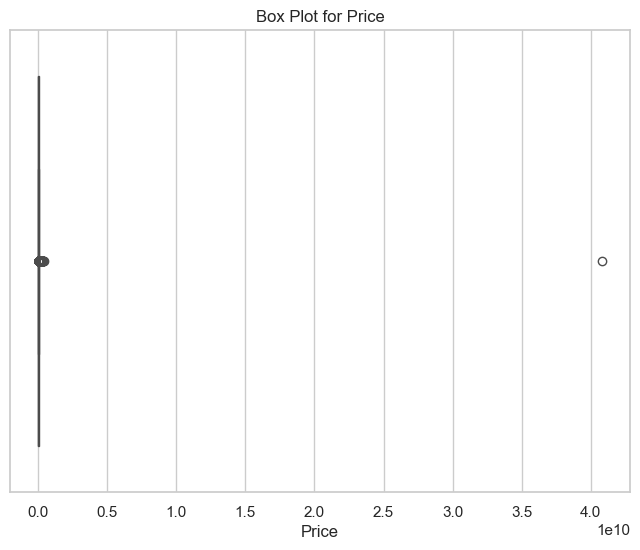

In [170]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a box plot for the 'price' variable
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(x='Price', data=data)
plt.title('Box Plot for Price')
plt.xlabel('Price')
plt.show()


In [164]:
numeric_features = ['Units Available','Maintenance Charges','Bathroom','floors','balconies',
                    'Covered Area','Carpet Area','bedroom'] #,'Floor No'
categorical_features = ['Possession Status','Ownership Type','furnished Type','Facing','Property Lifespan',
                        'Transaction Type','Type of Property']
categorical_features_bin = ['Commercial','Society','24H Water','isPrimeLocationProperty','Commercial','24H Elec','Power Back Up', 'Lift',
                            'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage',
                            'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking',
                            'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity',
                            'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room',
                            'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 
                            'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services',
                            'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool ', 'Private Jaccuzi',
                            'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Pool with temperature control ', 'Sea facing',
                            'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 'Health club with Steam / Jaccuzi', 'Large Clubhouse ',
                            'Large Open space', 'Fingerprint Access', 'Grand Entrance lobby', 'Private Garage', 'Fireplace', 'Wine Cellar',
                            'Sky Villa', 'Water Front', 'Hilltop', 'Smart Home', 'Barbeque space', 'Kids play area', 'Library', 'Puja Room',
                            'Study', 'Servant Room', 'Store', 'Aerobics Room', 'Canopy Walk', 'Coffee Lounge & Restaurants', 'Dance Studio',
                            'Event Space & Amphitheatre', 'Flower Gardens', 'Guest Accommodation', 'Indoor Squash & Badminton Courts',
                            'Kids Play Area', 'Kids Play Pool With Water Slides', 'Library And Business Centre', 'Meditation Area',
                            'Multipurpose Courts', 'Recreational Pool', 'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
                            'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']


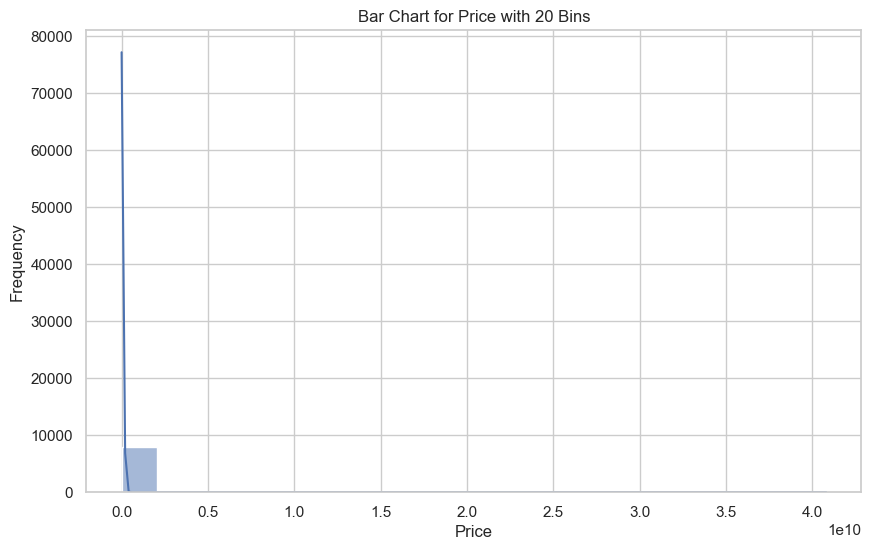

In [168]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart with 20 bins for the 'price' variable
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.histplot(x='Price', bins=20, data=data, kde=True)
plt.title('Bar Chart for Price with 20 Bins')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [163]:
pd.options.display.max_info_columns = 200 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7890 entries, 2 to 12672
Data columns (total 112 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    Possession Status                        7890 non-null   object 
 1    Floor No                                 7485 non-null   object 
 2    Commercial                               7890 non-null   object 
 3    Units Available                          7890 non-null   float64
 4    Price                                    7890 non-null   float64
 5    24H Elec                                 7890 non-null   float64
 6    Maintenance Charges                      4968 non-null   float64
 7    Covered Area                             7890 non-null   float64
 8    Carpet Area                              7890 non-null   float64
 9    Society                                  7890 non-null   object 
 10   Ownership Type                        

Units Available


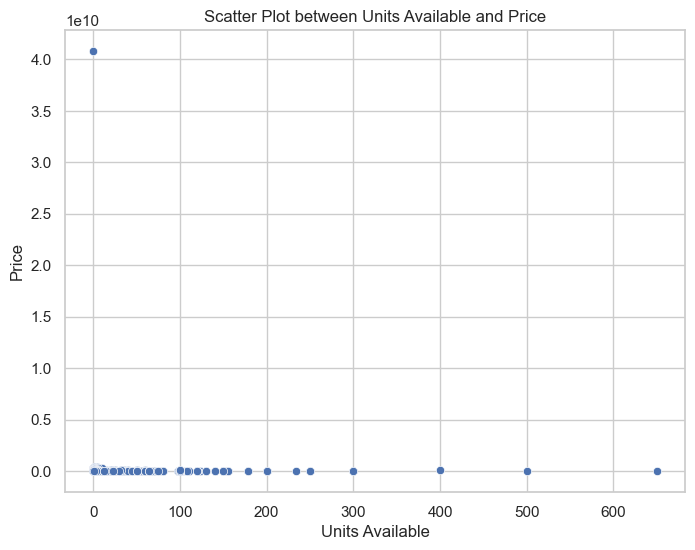

Maintenance Charges


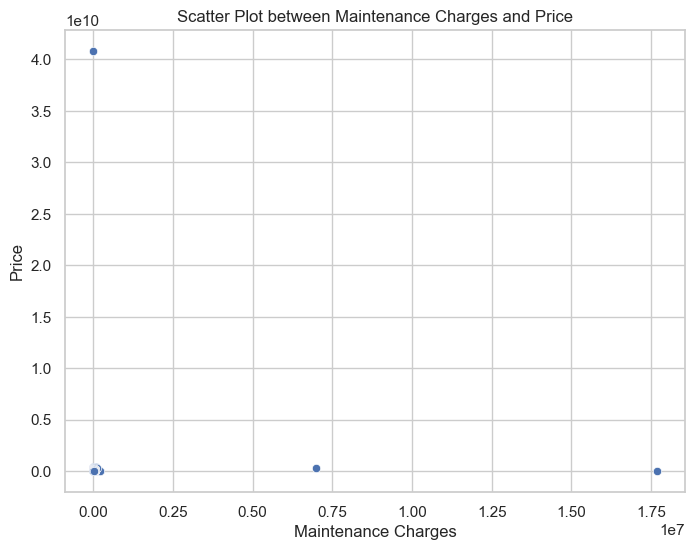

Bathroom


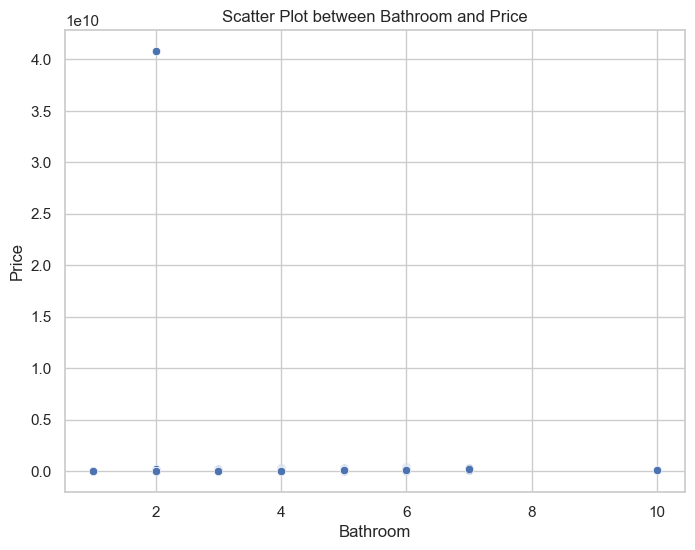

floors


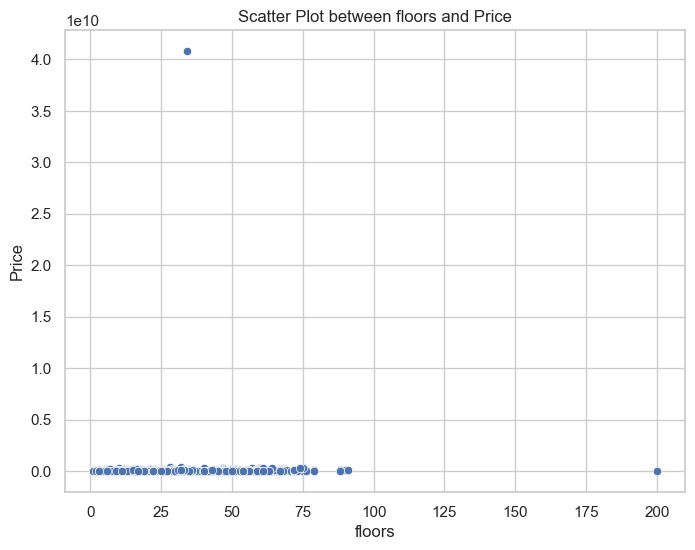

balconies


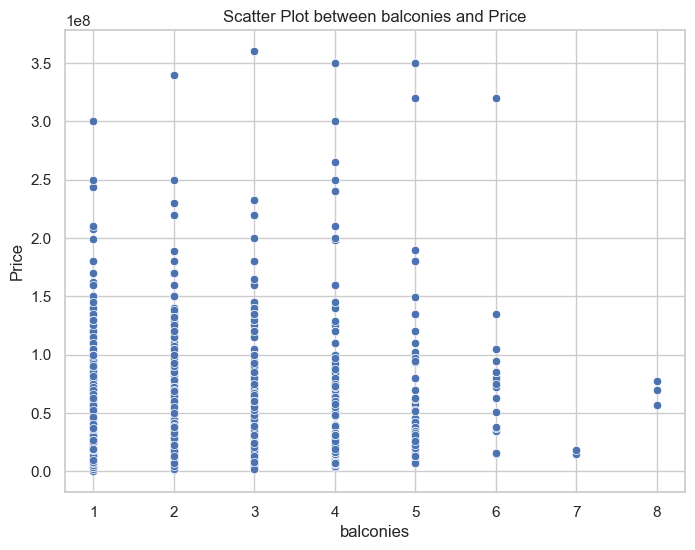

Covered Area


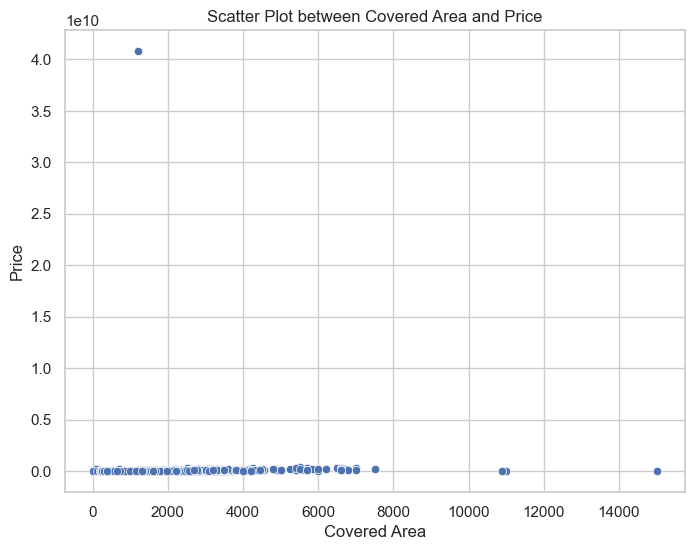

Carpet Area


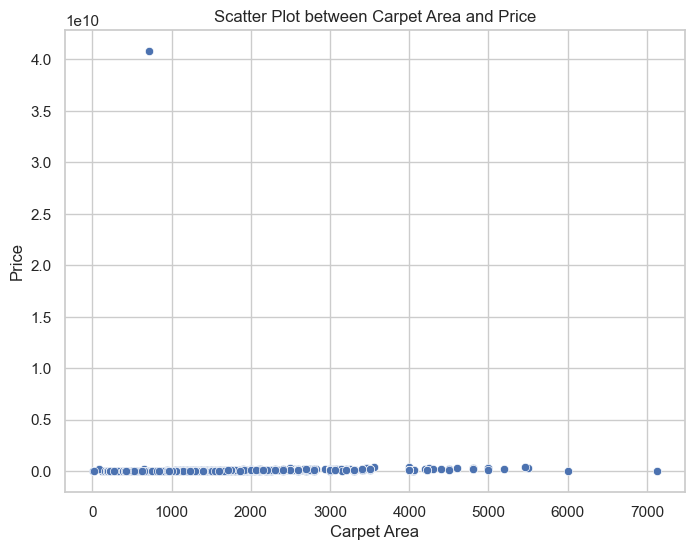

bedroom


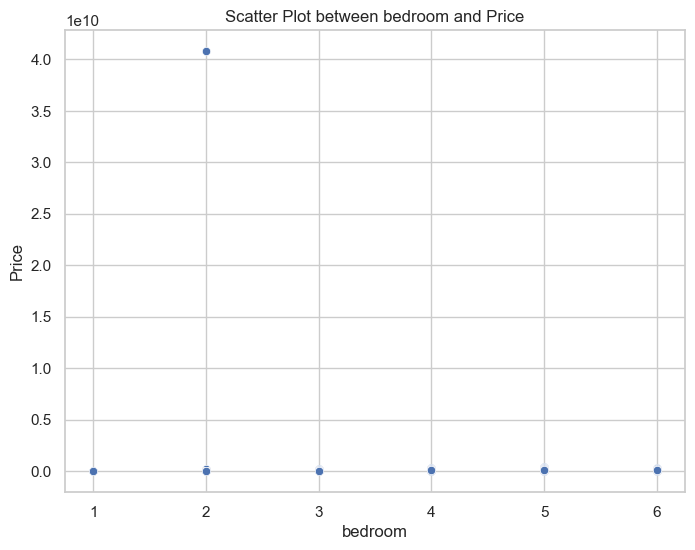

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your data
# Replace 'numeric_variable' with the actual names of your numeric colum
# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create a scatter plot for each numeric variable against the target 'price'
for col in numeric_features:
    print(col)
    plt.figure(figsize=(8, 6))  # Optional: Set the figure size
    sns.scatterplot(x=col, y='Price', data=data)
    plt.title(f'Scatter Plot between {col} and Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [ ]:
alt.data_transformers.disable_max_rows()  # Allows us to plot big datasets

alt.Chart(train_df.sort_values('income')).mark_bar(opacity=0.6).encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    alt.Color('income')
).properties(
    height=200
).repeat(
    train_df_nan.select_dtypes('number').columns.to_list(),
    columns=2
)

In [134]:
numeric_transformer = Pipeline([
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="most_frequent"))
        ])
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='most_frequent'))])

In [135]:
categorical_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("OneHot",OneHotEncoder(handle_unknown="ignore", dtype="int"))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('OneHot',
                 OneHotEncoder(dtype='int', handle_unknown='ignore'))])

In [136]:
categorical_bin_transformer = Pipeline([
        ("OneHotBinary",OneHotEncoder(sparse_output=False, dtype='int', drop="if_binary"))
])
categorical_bin_transformer

Pipeline(steps=[('OneHotBinary',
                 OneHotEncoder(drop='if_binary', dtype='int',
                               sparse_output=False))])

In [137]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
        ("categorical_bin", categorical_bin_transformer, categorical_features_bin)
    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Units Available', 'Floor No',
                                  'Maintenance Charges', 'Bathroom', 'floors',
                                  'balconies', 'Covered Area', 'Carpet Area',
                                  'bedroom']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneH...
                                  'Rain Water Harvesting', 'Club House',
                                  'Swimming Pool', 'Gymnasium', 'Park',
                                  'Parking.1', 'Security', 'Water Storage',
                                  'Private Terrace/Garden', 'Vaastu Compliant',
                                  'Service/Goods Lift', 'Air Conditioned',
                                  'Visitor Parking', 'Intercom Facility',
                                  'Maintenance Staff', 'Waste Disposal',
                                  'Laundry Service',
                                  'Internet/Wi-Fi Connectivity',
                                  'DTH Television Facility', 'RO Water System',
                                  'Banquet Hall', 'Bar/Lounge', ...])])

In [79]:
#data.to_csv('output.csv', index=False)

In [80]:
data.iloc[:, :15].head()

,Possession Status,Floor No,Commercial,Units Available,Price,24H Elec,Maintenance Charges,Covered Area,Carpet Area,Society,Ownership Type,furnished Type,Bathroom,Facing,Transaction Type
2,Ready to Move,18,N,0.0,5400000.0,1.0,1200.0,850.0,585.0,Y,Freehold,Unfurnished,2.0,East,New Property
3,Under Construction,5,N,70.0,9000000.0,1.0,3200.0,1050.0,815.0,Y,Freehold,Unfurnished,2.0,East,New Property
4,Under Construction,8,Y,1.0,4950000.0,1.0,NaN,561.0,419.0,Y,Freehold,Semi-Furnished,2.0,East,New Property
5,Under Construction,16,N,2.0,6570000.0,1.0,2.0,1067.0,667.0,Y,Freehold,Unfurnished,2.0,North - East,New Property
6,Ready to Move,1,N,4.0,5500000.0,1.0,2000.0,725.0,550.0,N,Co-operative Society,Unfurnished,2.0,East,Resale


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7890 entries, 2 to 12672
Columns: 112 entries, Possession Status to Aesthetically designed landscape garden
dtypes: float64(10), int64(91), object(11)
memory usage: 6.8+ MB


In [138]:
numeric_features

['Units Available',
 'Floor No',
 'Maintenance Charges',
 'Bathroom',
 'floors',
 'balconies',
 'Covered Area',
 'Carpet Area',
 'bedroom']

In [139]:
# Assign the splits to train_df and test_df
from sklearn.model_selection import cross_validate, train_test_split


# Split the dataset into 80% train and 20% test 
train_df, test_df = train_test_split(data, test_size=0.2, random_state=893)

In [140]:
X_train = train_df.drop(columns = ['Price'])
y_train = train_df['Price']
X_test = test_df.drop(columns =  ['Price'])
y_test = test_df['Price']

In [141]:
X_train

,Possession Status,Floor No,Commercial,Units Available,24H Elec,Maintenance Charges,Covered Area,Carpet Area,Society,Ownership Type,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
1381,Ready to Move,7,N,1.0,1.0,NaN,750.0,840.0,N,Freehold,...,0,0,0,0,0,0,0,0,0,0
1810,Ready to Move,9,N,10.0,1.0,4000.0,1050.0,629.0,Y,Freehold,...,1,1,1,1,1,1,1,1,1,1
10123,Ready to Move,6,Y,6.0,1.0,19000.0,1540.0,2500.0,Y,Freehold,...,1,1,1,1,1,1,1,1,1,1
5443,Ready to Move,6,N,1.0,1.0,NaN,955.0,650.0,N,Co-operative Society,...,0,0,0,0,0,0,0,0,0,0
5009,Ready to Move,0,N,1.0,1.0,NaN,2300.0,1900.0,Y,Co-operative Society,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,Ready to Move,9,N,1.0,1.0,NaN,890.0,750.0,N,NaN,...,0,0,0,0,0,0,0,0,0,0
6208,Under Construction,10,N,14.0,1.0,5000.0,954.0,954.0,Y,Leasehold,...,1,1,1,1,1,1,1,1,1,1
10984,Ready to Move,7,N,1.0,1.0,NaN,400.0,320.0,Y,Freehold,...,0,0,0,0,0,0,0,0,0,0
2768,Ready to Move,3,N,1.0,1.0,NaN,510.0,445.0,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [142]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Units Available', 'Floor No',
                                  'Maintenance Charges', 'Bathroom', 'floors',
                                  'balconies', 'Covered Area', 'Carpet Area',
                                  'bedroom']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneH...
                                  'Rain Water Harvesting', 'Club House',
                                  'Swimming Pool', 'Gymnasium', 'Park',
                                  'Parking.1', 'Security', 'Water Storage',
                                  'Private Terrace/Garden', 'Vaastu Compliant',
                                  'Service/Goods Lift', 'Air Conditioned',
                                  'Visitor Parking', 'Intercom Facility',
                                  'Maintenance Staff', 'Waste Disposal',
                                  'Laundry Service',
                                  'Internet/Wi-Fi Connectivity',
                                  'DTH Television Facility', 'RO Water System',
                                  'Banquet Hall', 'Bar/Lounge', ...])])

In [144]:
onehot_cols = (
    preprocessor
    .named_transformers_["categorical"]
    .named_steps["OneHot"]
    .get_feature_names_out(categorical_features)
)
onehot_cols

array(['Possession Status_Ready to Move',
       'Possession Status_Under Construction',
       'Ownership Type_Co-operative Society', 'Ownership Type_Freehold',
       'Ownership Type_Leasehold', 'Ownership Type_Power Of Attorney',
       'furnished Type_Furnished', 'furnished Type_Semi-Furnished',
       'furnished Type_Unfurnished', 'Facing_East', 'Facing_North',
       'Facing_North - East', 'Facing_North - West', 'Facing_South',
       'Facing_South - East', 'Facing_South -West', 'Facing_West',
       'Property Lifespan_10 to 15 years',
       'Property Lifespan_15 to 20 years',
       'Property Lifespan_5 to 10 years',
       'Property Lifespan_Above 20 years',
       'Property Lifespan_Less than 5 years',
       'Property Lifespan_New Construction',
       'Transaction Type_New Property', 'Transaction Type_Rent',
       'Transaction Type_Rent/Lease', 'Transaction Type_Resale',
       'Type of Property_Apartment',
       'Type of Property_Builder Floor Apartment',
       'Type of

In [146]:
onehot_cols_bin = (
    preprocessor
    .named_transformers_["categorical_bin"]
    .named_steps["OneHotBinary"]
    .get_feature_names_out(categorical_features_bin)
)
onehot_cols_bin

array(['Commercial_Y', 'Society_Y', '24H Water_1.0',
       'isPrimeLocationProperty_Y', 'Commercial_Y', '24H Elec_1.0',
       'Power Back Up_1', 'Lift_1', 'Rain Water Harvesting_1',
       'Club House_1', 'Swimming Pool_1', 'Gymnasium_1', 'Park_1',
       'Parking.1_1', 'Security_1', 'Water Storage_1',
       'Private Terrace/Garden_1', 'Vaastu Compliant_1',
       'Service/Goods Lift_1', 'Air Conditioned_1', 'Visitor Parking_1',
       'Intercom Facility_1', 'Maintenance Staff_1', 'Waste Disposal_1',
       'Laundry Service_1', 'Internet/Wi-Fi Connectivity_1',
       'DTH Television Facility_1', 'RO Water System_1', 'Banquet Hall_1',
       'Bar/Lounge_1', 'Cafeteria/Food Court_1', 'Conference Room_1',
       'Piped Gas_1', 'Jogging and Strolling Track_1',
       'Outdoor Tennis Courts_1', 'Mansion_1', 'Downtown_1',
       'Skyline View_1', 'Wrap Around Balcony_1',
       'Island Kitchen Layout_1', 'Full Glass Wall_1',
       'House help accommodation_1', 'Concierge Services_1',
   

In [150]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline

In [158]:
main_pipe = make_pipeline(
    preprocessor,
    RFE(LogisticRegression(max_iter=1000), n_features_to_select=60, step=10, verbose=1)
)

scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

pd.DataFrame(scores)

Fitting estimator with 136 features.
Fitting estimator with 86 features.
Fitting estimator with 137 features.
Fitting estimator with 87 features.
Fitting estimator with 137 features.
Fitting estimator with 87 features.
Fitting estimator with 137 features.
Fitting estimator with 87 features.
Fitting estimator with 137 features.
Fitting estimator with 87 features.


,fit_time,score_time,test_score,train_score
0,211.490633,0.060094,0.065717,0.277481
1,211.836640,0.045390,0.063341,0.260646
2,263.235635,0.068678,0.061014,0.268911
3,259.261157,0.054690,0.064976,0.270099
4,250.062584,0.041479,0.057052,0.286535


AttributeError: 'RFE' object has no attribute 'n_features_'

In [156]:
main_pipe.fit(X_train, y_train)
main_pipe.score(X_test, y_test)

Fitting estimator with 137 features.
Fitting estimator with 87 features.
Fitting estimator with 37 features.


0.048162230671736375

In [157]:
main_pipe.named_steps["rfe"].n_features_

30